In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AIML TRAINING/Mall_Customers.csv")

In [ ]:
df.shape

(200, 5)

In [ ]:
df.size

1000

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
x=df.iloc[:,[3,4]].values

In [ ]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)


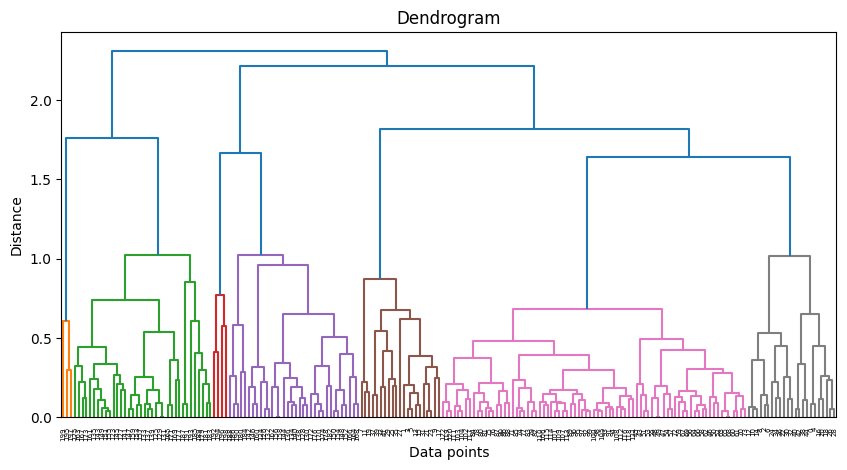

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(x_scaled, method='average')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()


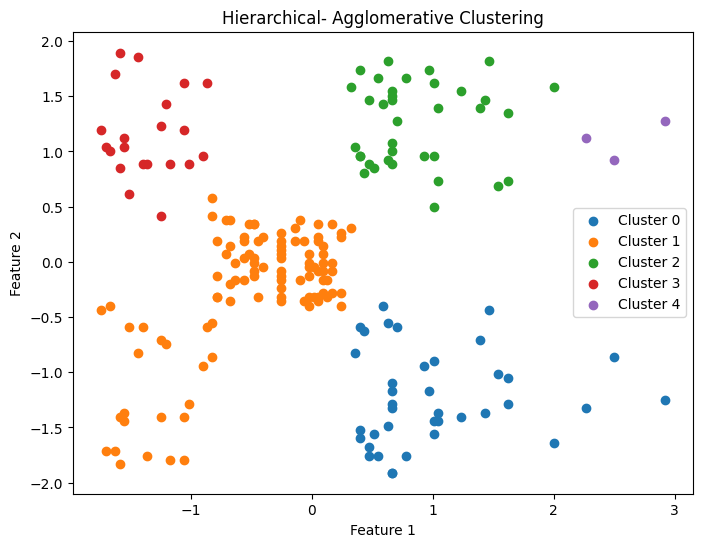

In [ ]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


x_scaled = StandardScaler().fit_transform(x)


hc = AgglomerativeClustering(n_clusters=5, linkage='average')
labels = hc.fit_predict(x_scaled)


unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

for label in unique_labels:
    plt.scatter(
        x_scaled[labels == label, 0],
        x_scaled[labels == label, 1],
        label=f'Cluster {label}'
    )

plt.title("Hierarchical- Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def divisive_clustering(X, n_clusters):
    labels = np.zeros(len(X), dtype=int)
    clusters = {0: X}

    current_label = 1

    while len(clusters) < n_clusters:
        # pick largest cluster to split
        cluster_to_split = max(clusters, key=lambda k: len(clusters[k]))
        data = clusters.pop(cluster_to_split)

        # split into 2 using kmeans
        km = KMeans(n_clusters=2, random_state=42, n_init=10)
        split_labels = km.fit_predict(data)

        clusters[current_label] = data[split_labels == 0]
        clusters[current_label + 1] = data[split_labels == 1]

        current_label += 2

    # assign final labels
    final_labels = np.zeros(len(X), dtype=int)
    idx = 0
    for i, (k, cluster_data) in enumerate(clusters.items()):
        for point in cluster_data:
            final_labels[np.all(X == point, axis=1)] = i

    return final_labels


In [ ]:
labels = divisive_clustering(x_scaled, n_clusters=5)


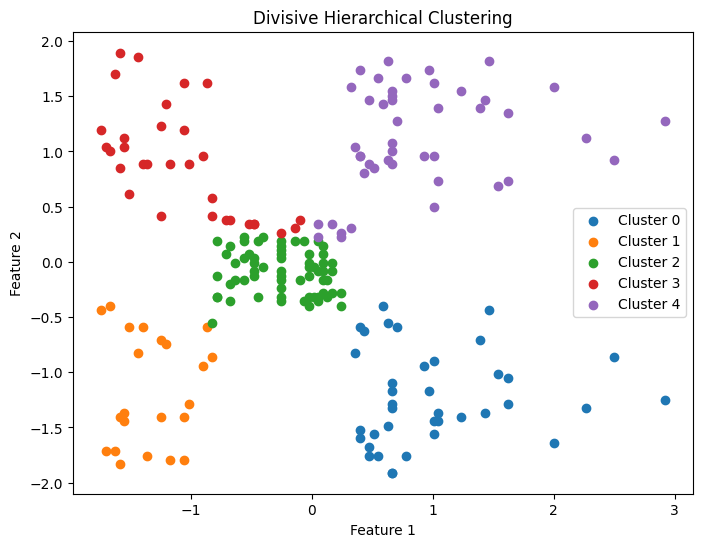

In [ ]:
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

for label in unique_labels:
    plt.scatter(
        x_scaled[labels == label, 0],
        x_scaled[labels == label, 1],
        label=f'Cluster {label}'
    )

plt.title("Divisive Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
